# 3) Loading Packages and Data

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import pymongo
import datetime
from statistics import mean
import collections

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from time import time
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import preprocessing
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import mean_squared_error


# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

!pip install -U jupyter
!pip3 install numpy==1.16.4
!pip install --upgrade pip
!pip3 install -U seaborn==0.9.0
!pip install pandasql
!pip install pymongo


from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# Pandas, and NumPy: 

from time import time


# Import the required libraries

import pymongo
import datetime
import collections

import scipy.stats


  Using cached numpy-1.16.4.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: numpy


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [264 lines of output]
  Running from numpy source directory.


    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Running setup.py install for numpy: started
  Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy-1.20.3.dist-info\
   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy-1.20.3.dist-info
  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy\
   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy
  Moving to c:\users\ajarir\anaconda3\scripts\f2py-script.py
   from C:\Users\ajarir\AppData\Local\Temp\pip-uninstall-4ukiowul\f2py-script.py
  Moving to c:\users\ajarir\anaconda3\scripts\f2py.exe
   from C:\Users\ajarir\AppData\Local\Temp\pip-uninstall-4ukiowul\f2py.exe


  C:\Users\ajarir\AppData\Local\Temp\pip-install-aheyis0j\numpy_8f8b88c4831247e4b61670984f9b778f\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
    return is_string(s) and ('*' in s or '?' is s)
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries blis not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  openblas_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; tr

ERROR: To modify pip, please run the following command:
C:\Users\ajarir\anaconda3\python.exe -m pip install --upgrade pip


  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)


In [51]:
from sklearn.preprocessing import MinMaxScaler

# Reading the data

In [39]:

# read in all our data
traineddata = pd.read_csv("data/train.csv")
test = pd.read_csv('data/test.csv')


# 4) Data Structure and Content

In [40]:
traineddata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
traineddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [42]:
traineddata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [43]:
traineddata['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [44]:
traineddata['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

# 5) Exploratory Data Analysis
Find the normality, and consistency of the data

# Checking the correctness of the data
## Finding the number of null, and duplicated values

In [45]:
train_data = pd.read_csv("data/train.csv")

In [49]:
# calculate summary statistics
#data_mean, data_std = dataframe.mean(), std(dataframe)
data_mean = mean(train_data._get_numeric_data())
data_std = std(train_data._get_numeric_data())
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
total_outliers = 0
for i, x in enumerate(train_data):
    if not i == 0:
        print ("Outliers in: " + str(x) + ": ")
        try:
            outliers = train_data[train_data[x] > train_data[x].mean() + 3 * train_data[x].std()]
            print (len(outliers))
            total_outliers += len(outliers)
        except:
            print("0")
#outliers = [x for x in dataframe[] if x < lower or x > upper]
print('Identified outliers: %d' % total_outliers)


Outliers in: Item_Weight: 
0
Outliers in: Item_Fat_Content: 
0
Outliers in: Item_Visibility: 
95
Outliers in: Item_Type: 
0
Outliers in: Item_MRP: 
0
Outliers in: Outlet_Identifier: 
0
Outliers in: Outlet_Establishment_Year: 
0
Outliers in: Outlet_Size: 
0
Outliers in: Outlet_Location_Type: 
0
Outliers in: Outlet_Type: 
0
Outliers in: Item_Outlet_Sales: 
90
Identified outliers: 185


# Visualize the outliers in Item_Visibility and Item_Outlet_Sales columns

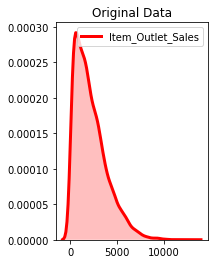

In [57]:


# Assign the column to a variable
col = traineddata['Item_Outlet_Sales']

# min-max scale the data between 0 and 1
scaled_data = minmax_scaling(col, columns=[0])

# plot both together to compare
# plot original data as a kernel density estimate
plt.subplot(1, 2, 1)
sns.kdeplot(col, color='r', linewidth=3, shade=True)
plt.title('Original Data')


plt.show()


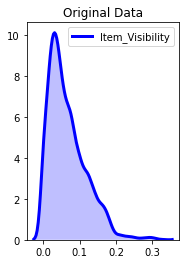

In [59]:


# Assign the column to a variable
col = traineddata['Item_Visibility']

# min-max scale the data between 0 and 1
scaled_data = minmax_scaling(col, columns=[0])

# plot both together to compare
# plot original data as a kernel density estimate
plt.subplot(1, 2, 1)
sns.kdeplot(col, color='b', linewidth=3, shade=True)
plt.title('Original Data')


plt.show()


# Show box plot for the outlirers of the data

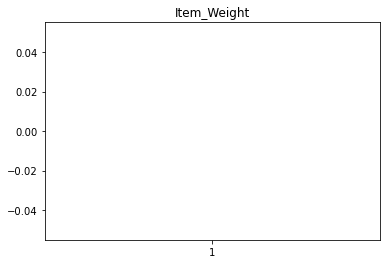

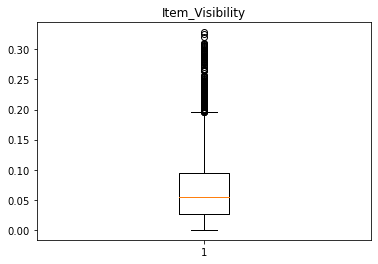

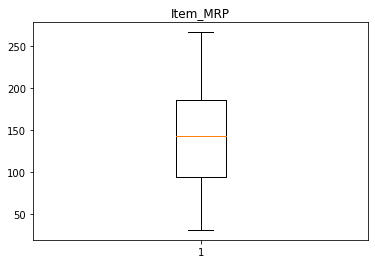

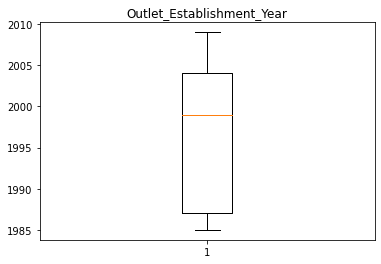

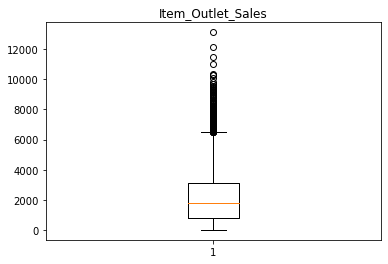

In [60]:

numeric_cols = traineddata._get_numeric_data().columns
for col in numeric_cols:
    plt.boxplot(traineddata[col])
    plt.title(col)
    plt.show()


In [10]:
numeric_features = traineddata.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [11]:
corr =numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [12]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


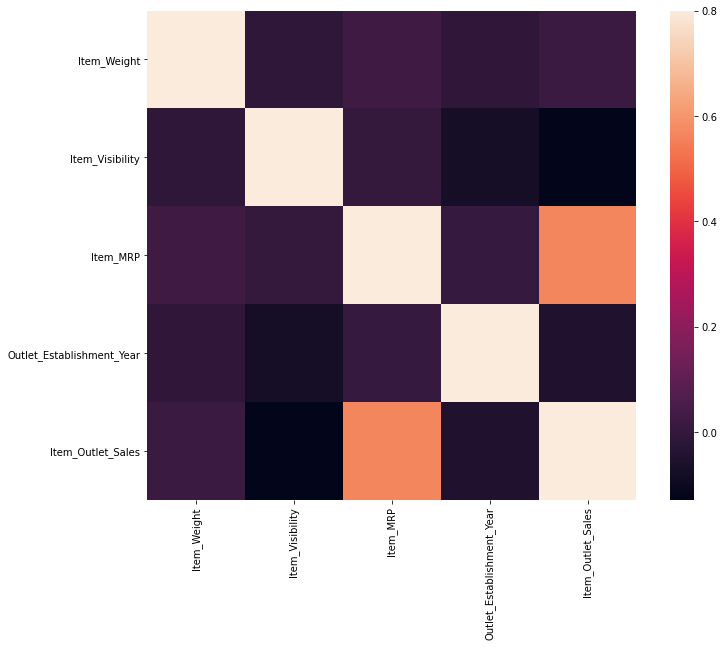

In [61]:
# correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

# 6) Univariate Analysis
Visualzing the featueres

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

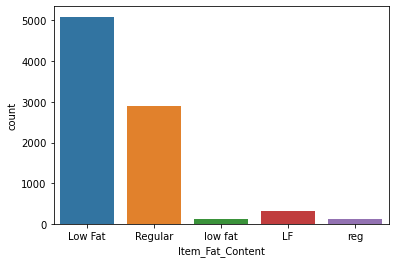

In [15]:
sns.countplot(traineddata.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

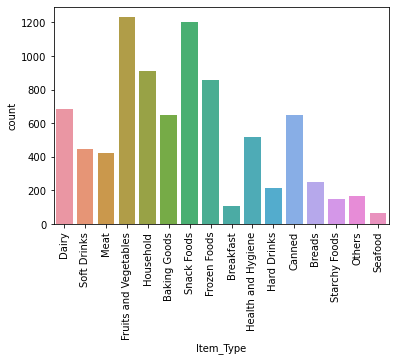

In [16]:
sns.countplot(traineddata.Item_Type)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

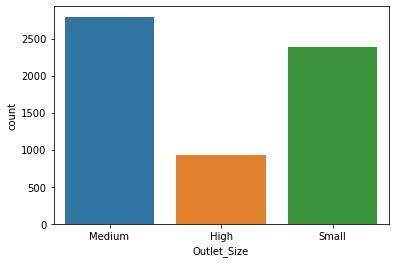

In [17]:
sns.countplot(traineddata.Outlet_Size)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

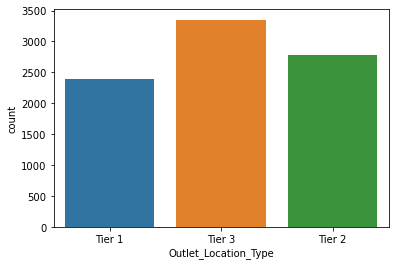

In [18]:
sns.countplot(traineddata.Outlet_Location_Type)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

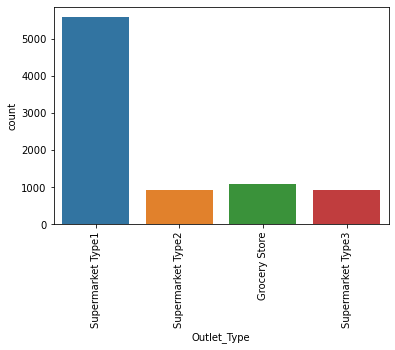

In [20]:
sns.countplot(traineddata.Outlet_Type)
plt.xticks(rotation=90)


# 7) Bivariate Analysis
Visualzing the relationship between the featueres, which has numeric values, and the target

# scatter plot with box plot overlay

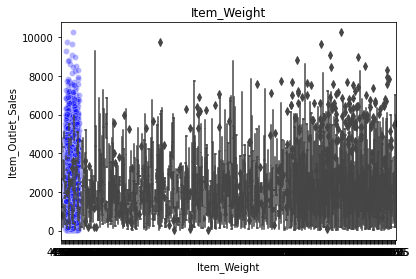

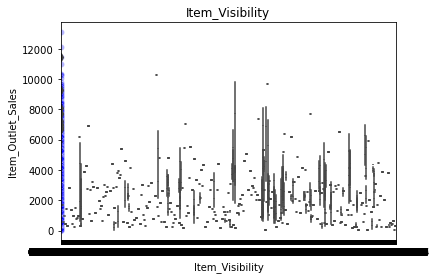

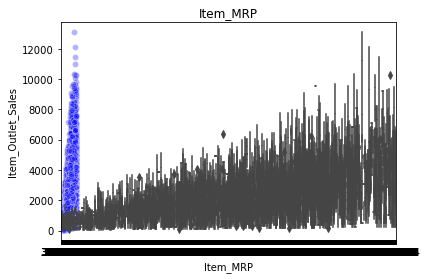

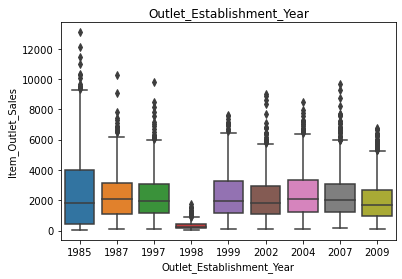

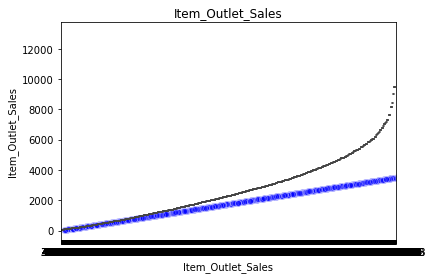

In [27]:
# scatter plot with box plot overlay
for col in numeric_cols:
    sns.scatterplot(data=traineddata, x=col, y="Item_Outlet_Sales", color='blue', alpha=0.3)
    sns.boxplot(data=traineddata, x=col, y="Item_Outlet_Sales")
    plt.title(col)
    plt.show()
